# Pymaceuticals Inc. (Partial Solution)
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
cleanData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleanData["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
import pandas as pd
import numpy as np
from scipy.stats import sem 

data = cleanData.groupby('Drug Regimen')['Tumor Volume (mm3)']

cleanMean = data.mean()
cleanMedian = data.median()
cleanVar = data.var()
cleanStd = data.std()
cleanSem = data.sem()

sumStats_df = pd.DataFrame({"Mean": cleanMean,
                             "Median": cleanMedian,
                            "Variance": cleanVar,
                             "Standard Deviation": cleanStd,
                             "SEM": cleanSem})


sumStats_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

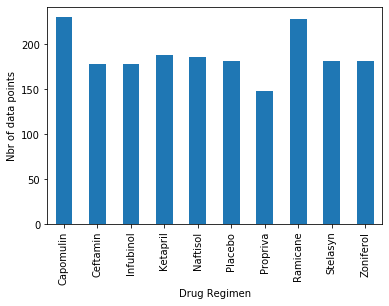

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

drugValues = cleanData.groupby('Drug Regimen')

mouseCounts = drugValues['Mouse ID'].count()

bar = mouseCounts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of data points")
plt.show()





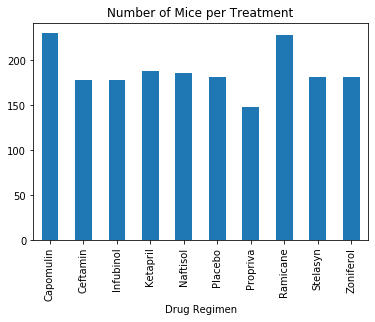

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


bar = mouseCounts.plot.bar(x="Drug Regimen", y="Mouse ID", title="Number of Mice per Treatment")
bar



## Pie Plots

Male      125
Female    123
Name: Sex, dtype: int64

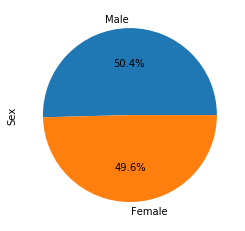

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex = mouse_metadata.loc[mouse_metadata['Mouse ID'] != 'g989'] 
sexCount = sex['Sex'].value_counts() 
sexCount.plot(kind='pie', autopct = '%1.1f%%')

sexCount

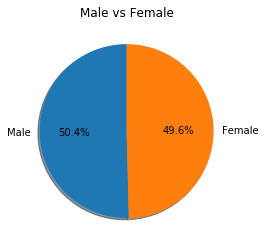

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = sex['Sex'].unique() #this would get just male & female 

plt.title("Male vs Female")
plt.pie(sexCount, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

mouseIDs = cleanData.groupby(['Mouse ID']) 
lastTumor = mouseIDs['Timepoint'].max()
lastTumor = lastTumor.reset_index() 
mergeData = lastTumor.merge(cleanData,on=["Mouse ID","Timepoint"],how="left")
mergeData

drugs = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

timepoints = []


for drug in drugs:

    finalTumor = mergeData.loc[mergeData["Drug Regimen"]== drug, 'Tumor Volume (mm3)']

    timepoints.append(finalTumor)

    quartiles =finalTumor.quantile([.25,.5,.75])
    
    lowerq=quartiles[0.25]
    upperq=quartiles[.75]
    
    iqr = upperq -lowerq
    lowerBound = lowerq - (1.5*iqr)
    upperBound= upperq + (1.5*iqr)
    
    outliers = finalTumor.loc[(finalTumor < lowerBound) | (finalTumor > upperBound)]
    
    print(f"{drug}'s outliers: {outliers}")

Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and Scatter Plots

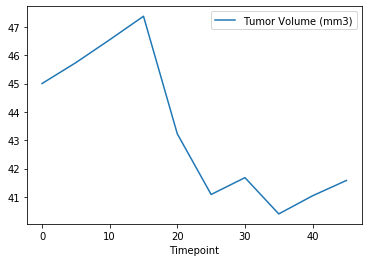

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin = cleanData.loc[cleanData['Drug Regimen'] == 'Capomulin']

#mouse ID r944 chosen 

r944Mouse = capomulin.loc[capomulin['Mouse ID'] == 'r944', :]
r944Mouse = r944Mouse[['Timepoint','Tumor Volume (mm3)']]
r944Mouse.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

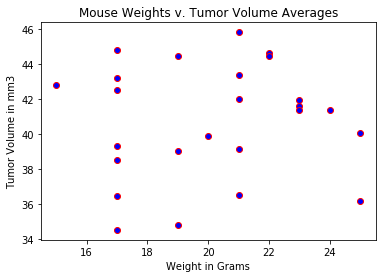

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatterPlot = capomulin.drop_duplicates(subset='Mouse ID', keep = 'last')
weight = scatterPlot['Weight (g)']

tumorMean = capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()


x = weight
y = tumorMean
plt.scatter(x, y, marker='o', alpha=1.0, facecolors='blue', edgecolors='red')

plt.title('Mouse Weights v. Tumor Volume Averages')
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume in mm3')
plt.show()

## Correlation and Regression

The correlation between both of the factors is 0.06
Rsquared is: 0.0036629329258747938


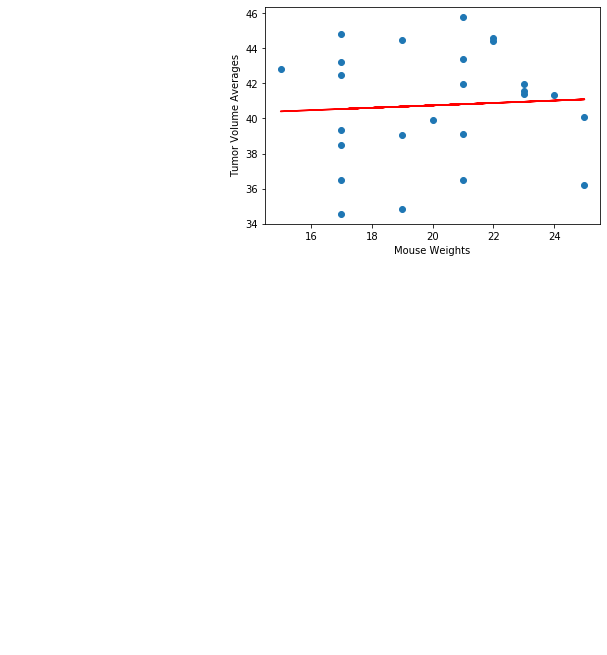

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,tumorMean)
print(f"The correlation between both of the factors is {round(correlation[0],2)}")

from scipy.stats import linregress

x = weight
y = tumorMean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regressVal = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regressVal,"r-")

plt.annotate(line,(6,10),fontsize=15,color="blue")
plt.xlabel('Mouse Weights')
plt.ylabel('Tumor Volume Averages')
print(f"Rsquared is: {rvalue**2}")

plt.show()

